<h1 align="center">
  <img alt="TinyAutoML Logo" src="https://user-images.githubusercontent.com/73651505/166115086-2cd01294-75ed-4e36-a65f-419c530a0dbe.png" width="448px"/><br/>
</h1>


<p align="center">TinyAutoML is a Machine Learning Python3.9 library thought as an extension of Scikit-Learn.<br/> It builds an <b>adaptable</b> and <b>auto-tuned</b> pipeline to handle binary classification tasks.<br/> </p>


<p align="center">
<a href="https://github.com/g0bel1n/TinyAutoML/actions/workflows/python-app.yml" 
target="_blank"><img src="https://github.com/g0bel1n/TinyAutoML/actions/workflows/python-app.yml/badge.svg?branch=master" alt="Tests" /></a>
<img src="https://img.shields.io/github/license/g0bel1n/TinyAutoML?style=flat-square" alt="Licence MIT" />
<img src="https://img.shields.io/pypi/v/TinyAutoML?style=flat-square" alt="Pypi" />
<img src="https://img.shields.io/github/repo-size/g0bel1N/TinyAutoML?style=flat-square" alt="Size" />
<img src="https://img.shields.io/github/commit-activity/m/g0bel1n/TinyAutoML?style=flat-square" alt="Commits" />
<a href="https://www.python.org/downloads/release/python-390/" 
target="_blank"><img src="https://img.shields.io/badge/python-3.9-blue.svg" alt="Python Version" /></a>
</p>

---

<p align="center">
In a few words, your data goes through 2 main preprocessing steps. <br/>
The first one is scaling and NonStationnarity correction, which is followed by Lasso Feature selection.<br/>
Finally, one of the three <b>MetaModels</b> is fitted on the transformed data.
</p>


---

### Latest News ! :

* Logging format changed from default to [TinyAutoML]
* Added Github Actions Workflow for CI, for updating the README.md !
* Added parallel computation of LassoFeatureSelector
* New example notebook based on VIX index directionnal forecasting


## ⚡️ Quick start 

First, let's install and import the library !

- Install the last release using pip

    ```python
    %pip install TinyAutoML
    ````

In [2]:
import os
os.chdir('..') #For Github CI, you don't have to run that

In [3]:
from TinyAutoML.Models import *
from TinyAutoML import MetaPipeline

## MetaModels

MetaModels inherit from the MetaModel Abstract Class. They all implement ensemble methods and therefore are based on EstimatorPools.

When training EstimatorPools, you are faced with a choice :  doing parameterTuning on entire pipelines with the estimators on the top or training the estimators using the same pipeline and only training the top. The first case refers to what we will be calling **comprehensiveSearch**.

Moreover, as we will see in details later, those EstimatorPools can be shared across MetaModels.

They are all initialised with those minimum arguments :

```python
MetaModel(comprehensiveSearch: bool = True, parameterTuning: bool = True, metrics: str = 'accuracy', nSplits: int=10)
```
- nSplits corresponds to the number of split of the cross validation
- The other parameters are equivoque


**They need to be put in the MetaPipeline wrapper to work**

**There are 3 MetaModels**

1- BestModel : selects the best performing model of the pool

In [4]:
best_model = MetaPipeline(BestModel(comprehensiveSearch = False, parameterTuning = False))

2- OneRulerForAll : implements Stacking using a RandomForestClassifier by default. The user is free to use another classifier using the ruler arguments

In [5]:
orfa_model = MetaPipeline(OneRulerForAll(comprehensiveSearch=False, parameterTuning=False))

3- DemocraticModel : implements Soft and Hard voting models through the voting argument

In [6]:
democratic_model = MetaPipeline(DemocraticModel(comprehensiveSearch=False, parameterTuning=False, voting='soft'))

As of release v0.2.3.2 (13/04/2022) there are 5 models on which these MetaModels rely in the EstimatorPool:
- Random Forest Classifier
- Logistic Regression
- Gaussian Naive Bayes
- Linear Discriminant Analysis
- XGBoost


***


We'll use the breast_cancer dataset from sklearn as an example:

In [7]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
 
X = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
y = cancer.target

cut = int(len(y) * 0.8)

X_train, X_test = X[:cut], X[cut:]
y_train, y_test = y[:cut], y[cut:]

Let's train a BestModel first and reuse its Pool for the other MetaModels

In [8]:
best_model.fit(X_train,y_train)

[TinyAutoML] Training models...
[TinyAutoML] The best estimator is random forest classifier with a cross-validation accuracy (in Sample) of 1.0


MetaPipeline(model=BestModel(comprehensiveSearch=False, parameterTuning=False))

We can now extract the pool

In [9]:
pool = best_model.get_pool()

And use it when fitting the other MetaModels to skip the fitting of the underlying models:

In [10]:
orfa_model.fit(X_train,y_train,pool=pool)
democratic_model.fit(X_train,y_train,pool=pool)

[TinyAutoML] Training models...
[TinyAutoML] Training models...


MetaPipeline(('model', Democratic Model))

Great ! Let's look at the results with the sk_learn classification report :

In [11]:
orfa_model.classification_report(X_test,y_test)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        26
           1       0.98      0.98      0.98        88

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



Looking good! What about the ROC Curve ?

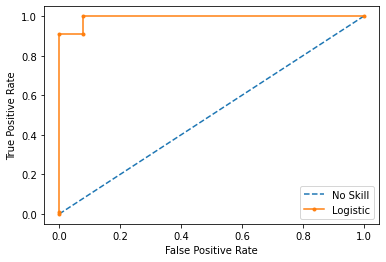

In [12]:
democratic_model.roc_curve(X_test,y_test)

Let's see how the estimators of the pool are doing individually:

In [13]:
best_model.get_scores(X_test,y_test)

[('random forest classifier', 1.0),
 ('Logistic Regression', 0.9473684210526315),
 ('Gaussian Naive Bayes', 0.956140350877193),
 ('LDA', 0.9473684210526315),
 ('xgb', 0.956140350877193)]

## What's next ? 

You can do the same steps with comprehensiveSearch set to True if you have the time and if you want to improve your results. You can also try new rulers and so on.

Maria, Thomas and Lucas.